# Week 6 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [3]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [ ]:
noise = .2

dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

In [ ]:
lucem_illud.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [ ]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [ ]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [1]:
lucem_illud.evaluateClassifier(clf, dfTest)

NameError: name 'lucem_illud' is not defined

This lets us look at which classes do better:

In [ ]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

In [ ]:
lucem_illud.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [ ]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

In [ ]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [ ]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

In [ ]:
lucem_illud.evaluateClassifier(clf, dfTest)

In [ ]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

In [ ]:
lucem_illud.plotMultiROC(clf, dfTest)

In [ ]:
lucem_illud.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [10]:
from IPython.display import display, Markdown, Latex
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
def evaluate_classifiers(trainset, labelset, testset):
    classifiers = {
        'Gaussian Naive Bayes': sklearn.naive_bayes.GaussianNB(),
        'SVC with linear kernel': sklearn.svm.SVC(kernel = 'linear', probability = True),
        'SVC with poly kernal': sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True),
        '5-NN (KNN with 5 neighbors)': sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
        'Logistic regression': sklearn.linear_model.LogisticRegression(),
        'Decision Tree': sklearn.tree.DecisionTreeClassifier(),
        'Random Forest': sklearn.ensemble.RandomForestClassifier(),
        'Multi-Layer Perceptron': sklearn.neural_network.MLPClassifier(),
        'Gradient Boost': sklearn.ensemble.GradientBoostingClassifier()
    }
    for type_clf in classifiers:
        clf = classifiers[type_clf]
        display(Markdown('### Evaluating {}'.format(type_clf)))
        clf.fit(trainset, labelset)
        display(lucem_illud.evaluateClassifier(clf, testset))
        #lucem_illud.plotConfusionMatrix(clf, testset)
        #lucem_illud.plotMultiROC(clf, testset)

def evaluate_artificial_datasets(noise):
    datasets = {
        'Random:': lucem_illud.random(),
        'Random2:': lucem_illud.random(),
        'AND Split': lucem_illud.andSplit(noise),
        'AND Split 2': lucem_illud.andSplit(noise*2),
        'XOR Split': lucem_illud.xorSplit(noise),
        'XOR Split 2': lucem_illud.xorSplit(noise*2),
        'Target Split': lucem_illud.targetSplit(noise),
        'Target Split 2': lucem_illud.targetSplit(noise*2),
        'MultiBlobs': lucem_illud.multiBlobs(noise),
        'MultiBlobs 2': lucem_illud.multiBlobs(noise*2)
    }
    for ds in datasets:
        display(Markdown('### Dataset: {}'.format(ds)))
        dfTrain, dfTest = lucem_illud.trainTestSplit(datasets[ds])
        evaluate_classifiers(np.stack(dfTrain['vect'], axis=0), dfTrain['category'], dfTest)
    
def evaluate_real_datasets():
    datasets = {
        'Reddit': lucem_illud.loadReddit(),
        'NewsGroups': lucem_illud.loadNewsGroups(),
        'Senate (small)': lucem_illud.loadSenateSmall(),
        'Senate (large)': lucem_illud.loadSenateLarge(),
        'Spam mail': lucem_illud.loadSpam()
    }
    for ds in datasets:
        display(Markdown('### Dataset: {}'.format(ds)))
        dfTrain, dfTest = lucem_illud.trainTestSplit(datasets[ds])
        evaluate_classifiers(np.stack(dfTrain['vect'], axis=0), dfTrain['category'], dfTest)

evaluate_artificial_datasets(0.15)

### Dataset: Random: with noise 0.15

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.489061,0.464636,0.525,0.462585,0.723404
1,0.489061,0.524761,0.525,0.509434,0.254717


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.496487,0.468262,0.505,0.466667,0.521277
1,0.496487,0.528262,0.505,0.526316,0.471698


### Evaluating SVC with poly kernal

/home/molo/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.5,0.47,0.53,0.47,1.0
1,0.5,0.53,0.53,0.00,0.0


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.503613,0.471812,0.5,0.473214,0.563830
1,0.503613,0.531814,0.5,0.534091,0.443396


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.48896,0.464599,0.52,0.461538,0.638298
1,0.48896,0.524663,0.52,0.514286,0.339623


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.439783,0.443830,0.56,0.41,0.436170
1,0.439783,0.503396,0.56,0.47,0.443396


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.466479,0.454273,0.54,0.442623,0.574468
1,0.466479,0.514649,0.54,0.487179,0.358491


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.486652,0.463485,0.525,0.460432,0.680851
1,0.486652,0.523624,0.525,0.508197,0.292453


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.451626,0.448232,0.55,0.424528,0.478723
1,0.451626,0.508232,0.55,0.478723,0.424528


### Dataset: Random2: with noise 0.15

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.472225,0.471815,0.53,0.460870,0.546392
1,0.472225,0.502005,0.53,0.482353,0.398058


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.48924,0.479750,0.51,0.473684,0.463918
1,0.48924,0.509732,0.51,0.504762,0.514563


### Evaluating SVC with poly kernal

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.480382,0.475491,0.525,0.470588,0.659794
1,0.480382,0.505783,0.525,0.484375,0.300971


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.520168,0.495489,0.48,0.504950,0.525773
1,0.520168,0.525473,0.48,0.535354,0.514563


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.471925,0.471693,0.53,0.460177,0.536082
1,0.471925,0.501853,0.53,0.482759,0.407767


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.454059,0.464361,0.545,0.436170,0.422680
1,0.454059,0.493980,0.545,0.471698,0.485437


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.504054,0.487038,0.5,0.488189,0.639175
1,0.504054,0.517047,0.5,0.520548,0.368932


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.490992,0.480560,0.515,0.478571,0.690722
1,0.490992,0.510631,0.515,0.500000,0.291262


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.509258,0.489718,0.49,0.494737,0.484536
1,0.509258,0.519704,0.49,0.523810,0.533981


### Dataset: AND Split with noise 0.15

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.925749,0.874634,0.075,0.904255,0.934066
1,0.925749,0.910501,0.075,0.943396,0.917431


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.921161,0.865743,0.08,0.894737,0.934066
1,0.921161,0.906356,0.08,0.942857,0.908257


### Evaluating SVC with poly kernal

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.90372,0.829700,0.1,0.851485,0.945055
1,0.90372,0.893831,0.1,0.949495,0.862385


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.926656,0.871612,0.075,0.895833,0.945055
1,0.926656,0.914591,0.075,0.951923,0.908257


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.925749,0.874634,0.075,0.904255,0.934066
1,0.925749,0.910501,0.075,0.943396,0.917431


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.931243,0.880523,0.07,0.905263,0.945055
1,0.931243,0.918744,0.07,0.952381,0.917431


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.93215,0.877483,0.07,0.896907,0.956044
1,0.93215,0.922985,0.07,0.961165,0.908257


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.925749,0.874634,0.075,0.904255,0.934066
1,0.925749,0.910501,0.075,0.943396,0.917431


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.934923,0.892996,0.065,0.923913,0.934066
1,0.934923,0.918792,0.065,0.944444,0.935780


### Dataset: AND Split 2 with noise 0.15

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.916667,0.855263,0.085,0.884211,0.933333
1,0.916667,0.903571,0.085,0.942857,0.900000


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.912121,0.846667,0.09,0.875000,0.933333
1,0.912121,0.899510,0.09,0.942308,0.890909


### Evaluating SVC with poly kernal

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.877778,0.780905,0.13,0.796296,0.955556
1,0.877778,0.875217,0.13,0.956522,0.800000


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.897475,0.824118,0.105,0.855670,0.922222
1,0.897475,0.883416,0.105,0.932039,0.872727


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.912121,0.846667,0.09,0.875000,0.933333
1,0.912121,0.899510,0.09,0.942308,0.890909


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.860101,0.765351,0.145,0.796117,0.911111
1,0.860101,0.847362,0.145,0.917526,0.809091


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.880303,0.791165,0.125,0.815534,0.933333
1,0.880303,0.871101,0.125,0.938144,0.827273


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.912121,0.846667,0.09,0.875000,0.933333
1,0.912121,0.899510,0.09,0.942308,0.890909


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.90303,0.83000,0.1,0.857143,0.933333
1,0.90303,0.89139,0.1,0.941176,0.872727


### Dataset: XOR Split with noise 0.15

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.439844,0.468693,0.56,0.432990,0.424242
1,0.439844,0.478403,0.56,0.446602,0.455446


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.583008,0.548098,0.415,0.633333,0.383838
1,0.583008,0.551372,0.415,0.564286,0.782178


### Evaluating SVC with poly kernal

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.69787,0.663293,0.3,0.842105,0.484848
1,0.69787,0.631028,0.3,0.643357,0.910891


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.874637,0.836368,0.125,0.902174,0.838384
1,0.874637,0.820944,0.125,0.851852,0.910891


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.439844,0.468693,0.56,0.432990,0.424242
1,0.439844,0.478403,0.56,0.446602,0.455446


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.884938,0.840148,0.115,0.887755,0.878788
1,0.884938,0.841255,0.115,0.882353,0.891089


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.879988,0.832268,0.12,0.878788,0.878788
1,0.879988,0.836493,0.12,0.881188,0.881188


### Evaluating Multi-Layer Perceptron

/home/molo/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.879788,0.838208,0.12,0.894737,0.858586
1,0.879788,0.830858,0.12,0.866667,0.900990


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.839884,0.785198,0.16,0.845361,0.828283
1,0.839884,0.785949,0.16,0.834951,0.851485


### Dataset: XOR Split 2 with noise 0.15

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.539098,0.495880,0.465,0.508621,0.621053
1,0.539098,0.546224,0.465,0.571429,0.457143


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.618546,0.545192,0.39,0.563910,0.789474
1,0.618546,0.604001,0.39,0.701493,0.447619


### Evaluating SVC with poly kernal

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.786717,0.752533,0.205,0.921875,0.621053
1,0.786717,0.725280,0.205,0.735294,0.952381


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.834837,0.764320,0.165,0.822917,0.831579
1,0.834837,0.794158,0.165,0.846154,0.838095


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.54386,0.498627,0.46,0.513043,0.621053
1,0.54386,0.549020,0.46,0.576471,0.466667


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.834837,0.764320,0.165,0.822917,0.831579
1,0.834837,0.794158,0.165,0.846154,0.838095


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.846366,0.770939,0.155,0.813725,0.873684
1,0.846366,0.813756,0.155,0.877551,0.819048


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.834837,0.764320,0.165,0.822917,0.831579
1,0.834837,0.794158,0.165,0.846154,0.838095


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.823308,0.757895,0.175,0.833333,0.789474
1,0.823308,0.776299,0.175,0.818182,0.857143


### Dataset: Target Split with noise 0.15

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.900966,0.880513,0.1,0.923077,0.888889
1,0.900966,0.838913,0.1,0.875000,0.913043


### Evaluating SVC with linear kernel

/home/molo/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.5,0.54,0.54,0.00,0.0
1,0.5,0.46,0.54,0.46,1.0


### Evaluating SVC with poly kernal

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.5,0.54,0.54,0.00,0.0
1,0.5,0.46,0.54,0.46,1.0


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.893921,0.865834,0.105,0.899083,0.907407
1,0.893921,0.838684,0.105,0.890110,0.880435


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.4219,0.513872,0.6,0.363636,0.148148
1,0.4219,0.425396,0.6,0.410256,0.695652


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.841385,0.814045,0.16,0.872549,0.824074
1,0.841385,0.757214,0.16,0.806122,0.858696


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.897142,0.880048,0.105,0.930693,0.870370
1,0.897142,0.828259,0.105,0.858586,0.923913


### Evaluating Multi-Layer Perceptron

/home/molo/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.902375,0.870873,0.095,0.893805,0.935185
1,0.902375,0.859600,0.095,0.919540,0.869565


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.911836,0.896601,0.09,0.941176,0.888889
1,0.911836,0.850319,0.09,0.877551,0.934783


### Dataset: Target Split 2 with noise 0.15

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.865785,0.800153,0.135,0.841584,0.885417
1,0.865785,0.832137,0.135,0.888889,0.846154


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.624599,0.553166,0.385,0.564626,0.864583
1,0.624599,0.610276,0.385,0.754717,0.384615


### Evaluating SVC with poly kernal

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.519231,0.489796,0.5,0.489796,1.000000
1,0.519231,0.538462,0.5,1.000000,0.038462


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.814904,0.743351,0.185,0.804124,0.812500
1,0.814904,0.769477,0.185,0.825243,0.817308


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.552484,0.508754,0.45,0.526786,0.614583
1,0.552484,0.549200,0.45,0.579545,0.490385


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.813301,0.750918,0.185,0.831461,0.770833
1,0.813301,0.761157,0.185,0.801802,0.855769


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.814904,0.743351,0.185,0.804124,0.812500
1,0.814904,0.769477,0.185,0.825243,0.817308


### Evaluating Multi-Layer Perceptron

/home/molo/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.860577,0.795000,0.14,0.84,0.875000
1,0.860577,0.824615,0.14,0.88,0.846154


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.809295,0.740071,0.19,0.808511,0.791667
1,0.809295,0.760900,0.19,0.811321,0.826923


### Dataset: MultiBlobs with noise 0.15

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.992706,0.973788,0.006,0.981132,0.990476
1,1.000000,1.000000,0.000,1.000000,1.000000
2,0.983295,0.964871,0.008,0.989474,0.969072
3,0.724617,0.410417,0.160,0.597701,0.536082
4,0.769089,0.455078,0.162,0.589286,0.653465


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.992706,0.973788,0.006,0.981132,0.990476
1,1.000000,1.000000,0.000,1.000000,1.000000
2,0.983295,0.964871,0.008,0.989474,0.969072
3,0.764805,0.451810,0.152,0.603960,0.628866
4,0.768022,0.476990,0.146,0.642857,0.623762


### Evaluating SVC with poly kernal

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.993972,0.983043,0.004,0.990476,0.990476
1,1.000000,1.000000,0.000,1.000000,1.000000
2,0.991123,0.961700,0.008,0.969697,0.989691
3,0.800223,0.471105,0.158,0.572581,0.731959
4,0.713752,0.434171,0.150,0.680556,0.485149


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.993972,0.983043,0.004,0.990476,0.990476
1,1.000000,1.000000,0.000,1.000000,1.000000
2,0.980814,0.945101,0.012,0.969072,0.969072
3,0.702093,0.360144,0.190,0.510000,0.525773
4,0.705985,0.379795,0.186,0.540816,0.524752


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.948583,0.897065,0.026,0.969388,0.904762
1,0.998750,0.990099,0.002,0.990099,1.000000
2,0.981006,0.916169,0.018,0.931373,0.979381
3,0.647105,0.321415,0.184,0.537313,0.371134
4,0.806062,0.483243,0.162,0.575758,0.752475


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.993972,0.983043,0.004,0.990476,0.990476
1,1.000000,1.000000,0.000,1.000000,1.000000
2,0.974419,0.927226,0.016,0.958763,0.958763
3,0.627830,0.276004,0.234,0.397959,0.402062
4,0.647646,0.305683,0.226,0.440000,0.435644


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.993972,0.983043,0.004,0.990476,0.990476
1,1.000000,1.000000,0.000,1.000000,1.000000
2,0.989883,0.952103,0.010,0.960000,0.989691
3,0.669067,0.314841,0.218,0.443396,0.484536
4,0.655227,0.321696,0.208,0.483146,0.425743


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.989210,0.975520,0.006,0.990385,0.980952
1,1.000000,1.000000,0.000,1.000000,1.000000
2,0.980814,0.945101,0.012,0.969072,0.969072
3,0.666291,0.350036,0.172,0.582090,0.402062
4,0.799859,0.473917,0.166,0.568182,0.742574


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.989210,0.975520,0.006,0.990385,0.980952
1,1.000000,1.000000,0.000,1.000000,1.000000
2,0.987209,0.963188,0.008,0.979381,0.979381
3,0.673838,0.326891,0.204,0.474227,0.474227
4,0.688565,0.352475,0.202,0.500000,0.504950


### Dataset: MultiBlobs 2 with noise 0.15

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.989382,0.976051,0.006,0.990566,0.981308
1,0.991167,0.962102,0.008,0.970000,0.989796
2,0.983602,0.965700,0.008,0.989691,0.969697
3,0.992456,0.972101,0.006,0.980000,0.989899
4,1.000000,1.000000,0.000,1.000000,1.000000


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.989382,0.976051,0.006,0.990566,0.981308
1,0.991167,0.962102,0.008,0.970000,0.989796
2,0.983602,0.965700,0.008,0.989691,0.969697
3,0.992456,0.972101,0.006,0.980000,0.989899
4,1.000000,1.000000,0.000,1.000000,1.000000


### Evaluating SVC with poly kernal

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.989382,0.976051,0.006,0.990566,0.981308
1,0.983577,0.935097,0.014,0.950495,0.979592
2,0.982355,0.955907,0.010,0.979592,0.969697
3,0.982355,0.955907,0.010,0.979592,0.969697
4,1.000000,1.000000,0.000,1.000000,1.000000


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.989382,0.976051,0.006,0.990566,0.981308
1,0.996269,0.970297,0.006,0.970297,1.000000
2,0.984848,0.975697,0.006,1.000000,0.969697
3,0.992456,0.972101,0.006,0.980000,0.989899
4,1.000000,1.000000,0.000,1.000000,1.000000


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.978764,0.952281,0.012,0.980952,0.962617
1,0.972129,0.909633,0.020,0.940000,0.959184
2,0.982355,0.955907,0.010,0.979592,0.969697
3,0.969760,0.920740,0.018,0.959184,0.949495
4,0.997519,0.979798,0.004,0.979798,1.000000


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.982165,0.950711,0.012,0.971963,0.971963
1,0.988679,0.943277,0.012,0.950980,0.989796
2,0.983602,0.965700,0.008,0.989691,0.969697
3,0.971007,0.930129,0.016,0.969072,0.949495
4,1.000000,1.000000,0.000,1.000000,1.000000


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.984709,0.968706,0.008,0.990476,0.971963
1,0.992537,0.942308,0.012,0.942308,1.000000
2,0.979798,0.967596,0.008,1.000000,0.959596
3,0.981108,0.946312,0.012,0.969697,0.969697
4,1.000000,1.000000,0.000,1.000000,1.000000


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.977492,0.943373,0.014,0.971698,0.962617
1,0.991167,0.962102,0.008,0.970000,0.989796
2,0.983602,0.965700,0.008,0.989691,0.969697
3,0.979861,0.936909,0.014,0.960000,0.969697
4,1.000000,1.000000,0.000,1.000000,1.000000


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.984709,0.968706,0.008,0.990476,0.971963
1,0.996269,0.970297,0.006,0.970297,1.000000
2,0.984848,0.975697,0.006,1.000000,0.969697
3,0.991209,0.962496,0.008,0.970297,0.989899
4,1.000000,1.000000,0.000,1.000000,1.000000


For all comparisons both here and in the real dataset section, I'm going to mostly use the error rate as a comparison tool. Real comparison of models would be dependent on use (depending on whether we care more about Type-1 or Type-2 error, etc) so I choose this measure as agnostic of usage.
For the random datasets: None of the models do well. That's expected! <br>
For the AND splits: They all have an error rate of 0.08 - 0.145. SVC seems to do the wost. Decision trees do worse with more noise.<br>
For the XOR splits: NB and Logistic do very badly, SVC have an error rate of 0.2-0.4. Decision trees, random forests, NN, GradBoost and even 5-NN do reasonably well with error rates of around 0.16. I suspect this to be the case due to the function not being linearly separable.<br>
For the target split: Naive Bayes, Random Forests, Decision Trees, 5NN and NN all do well, linear and poly kernel aren't the right kernel for this type of function so the SVC doesn't do well, but it would with a different kernel.<br>
For the blobs: The blob data creator tends to create very separable data, so all of the methods tend to do pretty well.<br>

In [11]:
evaluate_real_datasets(0.2)

Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Kennedy
Loading senator: Kerry
Loading senator: Klobuchar
Loading senator: Kohl
Loading senator: Kyl
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors


### Dataset: Reddit with noise 0.2

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Bad Roommates,0.745633,0.522286,0.178683,0.704225,0.581395
Weeaboo Tales,0.849869,0.514472,0.194357,0.536585,0.929577
Tales From Tech Support,0.911747,0.821477,0.053292,0.928571,0.844156
Relationships,0.679186,0.443304,0.206897,0.672727,0.435294


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Bad Roommates,0.992040,0.980014,0.006270,0.988372,0.988372
Weeaboo Tales,1.000000,1.000000,0.000000,1.000000,1.000000
Tales From Tech Support,0.982881,0.954996,0.012539,0.974026,0.974026
Relationships,0.983962,0.959764,0.012539,0.976471,0.976471


### Evaluating SVC with poly kernal

/home/molo/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Bad Roommates,0.5,0.269592,0.269592,0.000000,0.0
Weeaboo Tales,0.5,0.222571,0.777429,0.222571,1.0
Tales From Tech Support,0.5,0.241379,0.241379,0.000000,0.0
Relationships,0.5,0.266458,0.266458,0.000000,0.0


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Bad Roommates,0.979165,0.916305,0.025078,0.923913,0.988372
Weeaboo Tales,0.941646,0.898538,0.028213,0.984375,0.887324
Tales From Tech Support,0.955136,0.878811,0.034483,0.923077,0.935065
Relationships,0.911790,0.792407,0.068966,0.870588,0.870588


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Bad Roommates,0.984080,0.960299,0.012539,0.976744,0.976744
Weeaboo Tales,0.992958,0.989050,0.003135,1.000000,0.985915
Tales From Tech Support,0.985242,0.940797,0.015674,0.950000,0.987013
Relationships,0.980216,0.962487,0.012539,0.987952,0.964706


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Bad Roommates,0.891331,0.770680,0.078370,0.876543,0.825581
Weeaboo Tales,0.906406,0.780133,0.059561,0.882353,0.845070
Tales From Tech Support,0.843566,0.649944,0.109718,0.783784,0.753247
Relationships,0.840171,0.619958,0.141066,0.708333,0.800000


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Bad Roommates,0.943033,0.827277,0.056426,0.861702,0.941860
Weeaboo Tales,0.977851,0.924850,0.018809,0.945205,0.971831
Tales From Tech Support,0.933294,0.862268,0.040752,0.944444,0.883117
Relationships,0.906435,0.803105,0.065831,0.900000,0.847059


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Bad Roommates,0.976120,0.940854,0.018809,0.965116,0.965116
Weeaboo Tales,0.990942,0.975164,0.006270,0.985915,0.985915
Tales From Tech Support,0.989374,0.964840,0.009404,0.974359,0.987013
Relationships,0.978079,0.951141,0.015674,0.976190,0.964706


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Bad Roommates,0.955010,0.917867,0.028213,0.975309,0.918605
Weeaboo Tales,0.986909,0.948533,0.012539,0.958904,0.985915
Tales From Tech Support,0.981110,0.917927,0.021944,0.926829,0.987013
Relationships,0.956159,0.903430,0.031348,0.951807,0.929412


### Dataset: NewsGroups with noise 0.2

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
rec.autos,0.845388,0.664067,0.110638,0.796460,0.756303
comp.windows.x,0.888266,0.738193,0.082979,0.837607,0.830508
comp.sys.mac.hardware,0.795426,0.560256,0.174468,0.666667,0.728682
misc.forsale,0.778400,0.514718,0.146809,0.676768,0.644231


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
rec.autos,0.925220,0.777643,0.070213,0.825758,0.915966
comp.windows.x,0.919395,0.813713,0.057447,0.895652,0.872881
comp.sys.mac.hardware,0.887392,0.762877,0.082979,0.868852,0.821705
misc.forsale,0.886796,0.728259,0.074468,0.841584,0.817308


### Evaluating SVC with poly kernal

/home/molo/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
rec.autos,0.5,0.253191,0.253191,0.000000,0.0
comp.windows.x,0.5,0.251064,0.251064,0.000000,0.0
comp.sys.mac.hardware,0.5,0.274468,0.274468,0.000000,0.0
misc.forsale,0.5,0.221277,0.778723,0.221277,1.0


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
rec.autos,0.628516,0.323078,0.372340,0.364078,0.630252
comp.windows.x,0.555085,0.333574,0.223404,1.000000,0.110169
comp.sys.mac.hardware,0.540487,0.292433,0.474468,0.305785,0.573643
misc.forsale,0.537095,0.272631,0.206383,0.888889,0.076923


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
rec.autos,0.919593,0.765956,0.074468,0.818182,0.907563
comp.windows.x,0.927846,0.812477,0.057447,0.876033,0.898305
comp.sys.mac.hardware,0.884562,0.783110,0.076596,0.911504,0.798450
misc.forsale,0.913567,0.778678,0.059574,0.865385,0.865385


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
rec.autos,0.802653,0.537697,0.174468,0.629371,0.756303
comp.windows.x,0.845820,0.647178,0.117021,0.764706,0.771186
comp.sys.mac.hardware,0.733092,0.505224,0.191489,0.682243,0.565891
misc.forsale,0.806536,0.561611,0.129787,0.712871,0.692308


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
rec.autos,0.860483,0.646964,0.121277,0.731343,0.823529
comp.windows.x,0.861373,0.675075,0.106383,0.783333,0.796610
comp.sys.mac.hardware,0.776774,0.573855,0.159574,0.745455,0.635659
misc.forsale,0.849096,0.631615,0.106383,0.754717,0.769231


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
rec.autos,0.929565,0.807539,0.059574,0.864000,0.907563
comp.windows.x,0.946263,0.873410,0.038298,0.931034,0.915254
comp.sys.mac.hardware,0.891268,0.768369,0.080851,0.869919,0.829457
misc.forsale,0.892313,0.722763,0.076596,0.820755,0.836538


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
rec.autos,0.895449,0.689050,0.106383,0.737931,0.899160
comp.windows.x,0.901002,0.768865,0.072340,0.862069,0.847458
comp.sys.mac.hardware,0.827264,0.664548,0.121277,0.821429,0.713178
misc.forsale,0.849044,0.658412,0.095745,0.804124,0.750000


### Dataset: Senate (small) with noise 0.2

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Obama,0.84954,0.704702,0.146628,0.772727,0.836066
Clinton,0.84954,0.868405,0.146628,0.904306,0.863014


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Obama,0.995902,0.994736,0.002933,1.000000,0.991803
Clinton,0.995902,0.995455,0.002933,0.995455,1.000000


### Evaluating SVC with poly kernal

/home/molo/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Obama,0.5,0.357771,0.357771,0.000000,0.0
Clinton,0.5,0.642229,0.357771,0.642229,1.0


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Obama,0.881915,0.760862,0.11437,0.821705,0.868852
Clinton,0.881915,0.894880,0.11437,0.924528,0.894977


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Obama,0.995902,0.994736,0.002933,1.000000,0.991803
Clinton,0.995902,0.995455,0.002933,0.995455,1.000000


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Obama,0.993619,0.986606,0.005865,0.991803,0.991803
Clinton,0.993619,0.993821,0.005865,0.995434,0.995434


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Obama,0.969028,0.955025,0.02346,0.991379,0.942623
Clinton,0.969028,0.967397,0.02346,0.968889,0.995434


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Obama,0.967625,0.924779,0.032258,0.944000,0.967213
Clinton,0.967625,0.970638,0.032258,0.981481,0.968037


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Obama,0.997717,0.991870,0.002933,0.99187,1.000000
Clinton,0.997717,0.998366,0.002933,1.00000,0.995434


### Dataset: Senate (large) with noise 0.2

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kyl,0.673694,0.415850,0.093590,0.926829,0.351852
Kohl,0.674634,0.351530,0.056410,0.846154,0.354839
Kennedy,0.729031,0.610763,0.288462,0.623574,0.923944
Klobuchar,0.742295,0.457704,0.044872,0.852941,0.491525
Kerry,0.716540,0.467452,0.185897,0.666667,0.520408


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kyl,0.986111,0.976068,0.003846,1.000000,0.972222
Kohl,0.983175,0.954441,0.003846,0.983607,0.967742
Kennedy,0.964490,0.930008,0.037179,0.938172,0.983099
Klobuchar,0.974576,0.952999,0.003846,1.000000,0.949153
Kerry,0.954047,0.909255,0.028205,0.967742,0.918367


### Evaluating SVC with poly kernal

/home/molo/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kyl,0.5,0.138462,0.138462,0.000000,0.0
Kohl,0.5,0.079487,0.079487,0.000000,0.0
Kennedy,0.5,0.455128,0.544872,0.455128,1.0
Klobuchar,0.5,0.075641,0.075641,0.000000,0.0
Kerry,0.5,0.251282,0.251282,0.000000,0.0


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kyl,0.816634,0.615848,0.061538,0.875000,0.648148
Kohl,0.861915,0.598971,0.037179,0.779661,0.741935
Kennedy,0.837763,0.738263,0.167949,0.769231,0.901408
Klobuchar,0.901925,0.724118,0.023077,0.872727,0.813559
Kerry,0.780350,0.559963,0.148718,0.735294,0.637755


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kyl,0.930556,0.880342,0.019231,1.000000,0.861111
Kohl,0.975110,0.939599,0.005128,0.983333,0.951613
Kennedy,0.938608,0.878508,0.065385,0.885787,0.983099
Klobuchar,0.932203,0.874663,0.010256,1.000000,0.864407
Kerry,0.937028,0.876938,0.038462,0.956044,0.887755


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kyl,0.994626,0.982849,0.002564,0.990741,0.990741
Kohl,0.998607,0.968750,0.002564,0.968750,1.000000
Kennedy,0.996007,0.994121,0.003846,0.997175,0.994366
Klobuchar,0.991525,0.984333,0.001282,1.000000,0.983051
Kerry,1.000000,1.000000,0.000000,1.000000,1.000000


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kyl,0.986111,0.976068,0.003846,1.000000,0.972222
Kohl,0.973021,0.895039,0.008974,0.936508,0.951613
Kennedy,0.967539,0.932105,0.034615,0.936170,0.991549
Klobuchar,0.879969,0.748205,0.020513,0.957447,0.762712
Kerry,0.971921,0.946737,0.016667,0.984127,0.948980


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kyl,0.972222,0.952137,0.007692,1.000000,0.944444
Kohl,0.950917,0.895072,0.008974,0.982456,0.903226
Kennedy,0.938161,0.885997,0.064103,0.902375,0.963380
Klobuchar,0.982357,0.952009,0.003846,0.982759,0.966102
Kerry,0.918280,0.826569,0.053846,0.918478,0.862245


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kyl,0.995370,0.992023,0.001282,1.000000,0.990741
Kohl,0.991935,0.985153,0.001282,1.000000,0.983871
Kennedy,0.997647,0.994398,0.002564,0.994398,1.000000
Klobuchar,1.000000,1.000000,0.000000,1.000000,1.000000
Kerry,1.000000,1.000000,0.000000,1.000000,1.000000


### Dataset: Spam mail with noise 0.2

### Evaluating Gaussian Naive Bayes

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.853877,0.950343,0.144737,0.968566,0.855903
spam,0.853877,0.471223,0.144737,0.525714,0.851852


### Evaluating SVC with linear kernel

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.741898,0.911793,0.086257,0.912281,0.993056
spam,0.741898,0.536712,0.086257,0.929825,0.490741


### Evaluating SVC with poly kernal

/home/molo/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.5,0.842105,0.157895,0.842105,1.0
spam,0.5,0.157895,0.157895,0.000000,0.0


### Evaluating 5-NN (KNN with 5 neighbors)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.70544,0.900629,0.109649,0.902087,0.975694
spam,0.70544,0.424488,0.109649,0.770492,0.435185


### Evaluating Logistic regression

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.643519,0.882083,0.112573,0.882083,1.000000
spam,0.643519,0.399610,0.112573,1.000000,0.287037


### Evaluating Decision Tree

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.761863,0.918384,0.109649,0.922428,0.949653
spam,0.761863,0.458379,0.109649,0.681319,0.574074


### Evaluating Random Forest

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.763021,0.918596,0.095029,0.920923,0.970486
spam,0.763021,0.503076,0.095029,0.779221,0.555556


### Evaluating Multi-Layer Perceptron

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.784722,0.925660,0.096491,0.929293,0.958333
spam,0.784722,0.509552,0.096491,0.733333,0.611111


### Evaluating Gradient Boost

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.65191,0.884542,0.111111,0.884615,0.998264
spam,0.65191,0.406218,0.111111,0.970588,0.305556


For the Reddit data: NN does very well, as does Linear kernel SVM ! Poly SVM does not, maybe because of overfitting with the poly kernel. Bayes also doesn't do as well as the others. The rest are more or less about the same.

For NewsGroups, Poly kernel SVM also do badly and this time 5NN does very badly. Logistic regression, linear kernel SVM and Multi-Layer perceptron are the winners in this case, with error rates around 0.07. The rest do okay, with error rates around 0.1. 

For the small Senate dataset, it's a similar pattern. Linear kernel SVM, logistic regression and gradient boosting all have error rates of around 0.003, with decision trees trailing closely at 0.005. Perhaps there weren't enough observations for the NN to learn enough of the classification so we'll see on the larger dataset. 

For the larger Senate dataset, every method does worse with Kennedy than with the rest of the Senators. There is probably meaning behind this. Perhaps his speech style was copied by others? 
Gradient Boosting did really really well with error rates of around 0.1%! Decision trees did pretty good too. linear kernel SVMs and MultiLayer Perceptrons came next. Clearly poly kernels are bad at this kind of job.

For Spam/Ham mail, other than polynomial kernel SVM, all of the others have similar performance. 

### Gradient Tree Boosting with a target dataset

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.886619,0.820813,0.115,0.847619,0.927083
1,0.886619,0.863806,0.115,0.926316,0.846154


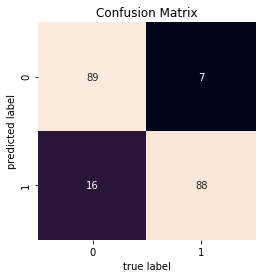

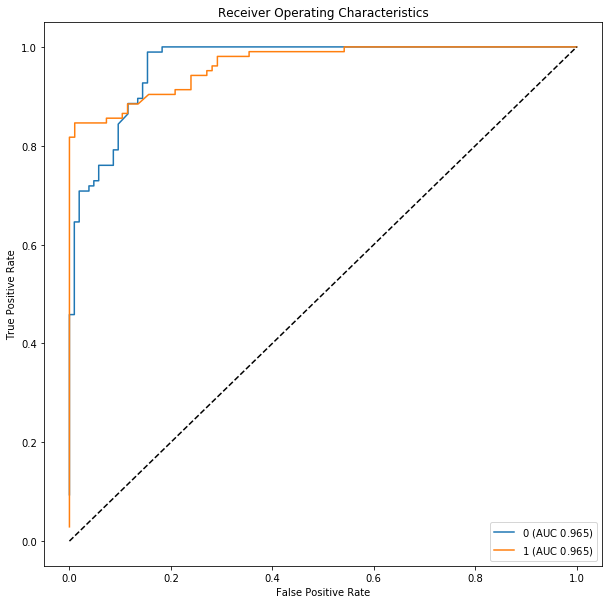

### Gradient Tree Boosting with the Newsgroups dataset

Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
rec.autos,0.885359,0.718523,0.097872,0.798507,0.849206
comp.windows.x,0.908564,0.776771,0.072340,0.854839,0.868852
comp.sys.mac.hardware,0.846216,0.622945,0.104255,0.752475,0.760000
misc.forsale,0.888496,0.772685,0.074468,0.891892,0.811475


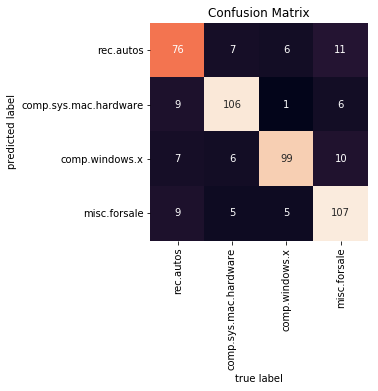

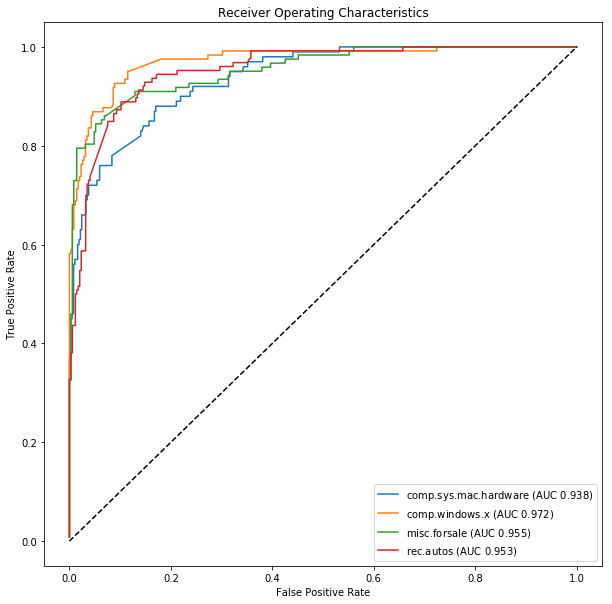

In [14]:
# Using Gradient Tree Boosting with all default parameters
display(Markdown('### Gradient Tree Boosting with a target dataset'))
noise = 0.2
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
display(lucem_illud.evaluateClassifier(clf, dfTest))
lucem_illud.plotConfusionMatrix(clf, dfTest)
lucem_illud.plotMultiROC(clf, dfTest)

display(Markdown('### Gradient Tree Boosting with the Newsgroups dataset'))
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
clf = sklearn.ensemble.GradientBoostingClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
display(lucem_illud.evaluateClassifier(clf, dfTest))
lucem_illud.plotConfusionMatrix(clf, dfTest)
lucem_illud.plotMultiROC(clf, dfTest)


The Gradient Tree Boosting uses a series of very small decision trees, boosting them in a manner that is different but similar conceptually to AdaBoost or other ensemble methods with boosting. It does well for the newsgroups; not sure I can explain why but in general is known to be a flexible method with good results. It doesn't do as well on the target artificial dataset as some of the other algorithms, but it also doesn't do too badly.

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [ ]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

Let's turn the 'targetSenator' column into a binary category variable.

In [ ]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [ ]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: nltk.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

Let's split the data into training data and testing data.

In [ ]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [ ]:
print(len(train_data_df))
print(len(test_data_df))

## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud.generateVecs()` will help with this but for now we are doing it the long way):

In [ ]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [ ]:
TFVects.shape

We can save this in the dataframe to make things easier

In [ ]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [ ]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [ ]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

In [ ]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [ ]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [ ]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [ ]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [ ]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

Slightly poorer. How about using more dimensions (40)?

In [ ]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Or still more (100)?

In [ ]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Or even more (200)!

In [ ]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

This is becoming ridiculous (400)!

In [ ]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [ ]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l1')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

Train the model using training data, and then test it on the testing data.

In [ ]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [ ]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

In [ ]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [ ]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [ ]:
sklearn.metrics.precision_score(test_data_df['nb_predict'], test_data_df['category'])

Recall:

In [ ]:
sklearn.metrics.recall_score(test_data_df['nb_predict'], test_data_df['category'])

F1-measure:

In [ ]:
sklearn.metrics.f1_score(test_data_df['nb_predict'], test_data_df['category'])

Let's take a look at how well our posterior distribution looks relative to the truth.

In [ ]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [ ]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [ ]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

We can pick specific categories, and pull the relevant training and testing sets. 

In [ ]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Now we need to tokenize, and make a training and testing set:

In [ ]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: nltk.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

In [ ]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [ ]:
print(len(train_ng_df))
print(len(test_ng_df))

We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [ ]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [ ]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

...and save predictions to the dataframe:

In [ ]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

In [ ]:
train_ng_df[['category', 'nb_predict']][:10]

Looks pretty good, lets examine the testing dataset:

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

In [ ]:
lucem_illud.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [ ]:
print(sklearn.metrics.precision_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #F-1 measure

We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [ ]:
lucem_illud.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

In [ ]:
lucem_illud.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

In [ ]:
lucem_illud.plotregions(MultinomialNB_ng, test_ng_df)

We can also give the model a new string, not present in our data, and use the *predict* method to see if it can assign it to a category. Using our model to extend its classifications to new, uncoded data might be the primary purpose of a social science application. The words do have to be in the vocabulary, so don't be too creative :-)

In [ ]:
def predict_category(s, model, tfidf): #We just define a simple function here
    a = np.zeros((1, len(tfidf.vocabulary_)))
    for w in nltk.word_tokenize(s):
        try:
            a[:,tfidf.vocabulary_[lucem_illud.stemmer_basic.stem(w.lower())]] = 1
        except KeyError:
            print("Warning: '{}' not in vocabulary".format(w))
    return model.predict(a)[0]

In [ ]:
predict_category('rockets are cool', MultinomialNB_ng, TFVectorizer_ng)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [32]:
import pandas
import pyanno 
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

turk_results = pandas.read_csv('../data/Batch_3103115_batch_results.csv')
cols_of_interest = ['WorkerId', 'Input.index', 'Answer.Q1Answer' ]
turk_select = turk_results[cols_of_interest]
test1 = turk_select.melt(id_vars=['WorkerId', 'Input.index'], value_vars=['Answer.Q1Answer'], var_name='QuestionNo', value_name='Answer')
rightform = test1.pivot(index='Input.index', columns='WorkerId', values='Answer')
as_np_array = rightform.fillna(-1).as_matrix()
headline_anno = AnnotationsContainer.from_array(as_np_array, missing_values=[-1])

model = ModelBt.create_initial_state(2, as_np_array.shape[1])
model.map(headline_anno.annotations)
labels = model.infer_labels(headline_anno.annotations)
rightform['label'] = np.round(labels)[:,1]
rightform['label'] = rightform['label'].apply(int)

In [33]:
# Joining labels via ModelBt with the actual news dataset
news_df = pandas.read_pickle('../data/news_utf8encoded.pkl')
news_df_labeled = news_df.join(rightform['label'], how='inner')

# Vectorizing all labeled data
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(news_df_labeled['title'])
news_df_labeled['vect'] = [np.array(v).flatten() for v in TFVects.todense()]
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(news_df_labeled['vect'], axis=0))
news_df_labeled['pca'] = [r for r in reduced_data]
news_train, news_test = lucem_illud.trainTestSplit(news_df_labeled, holdBackFraction=0.2)


In [34]:
news_train['pca_reduced'] = news_train['pca'].apply(lambda x: x[:30])
logistic = sklearn.linear_model.LogisticRegression(penalty = 'l2')
logistic.fit(np.stack(news_train['pca_reduced'], axis=0), news_train['label'])
logistic.score(np.stack(news_train['pca_reduced'], axis=0), news_train['label'])

#testing
news_test['pca_reduced'] = news_test['pca'].apply(lambda x: x[:30])
logistic.score(np.stack(news_test['pca_reduced'], axis=0), news_test['label'])

news_test['log_predict'] = logistic.predict(np.stack(news_test['pca_reduced'], axis=0))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.8064516129032258

0.5217391304347826

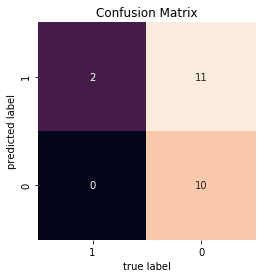

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.576923,0.632107,0.478261,1.00000,0.153846
1,0.576923,0.476190,0.478261,0.47619,1.000000


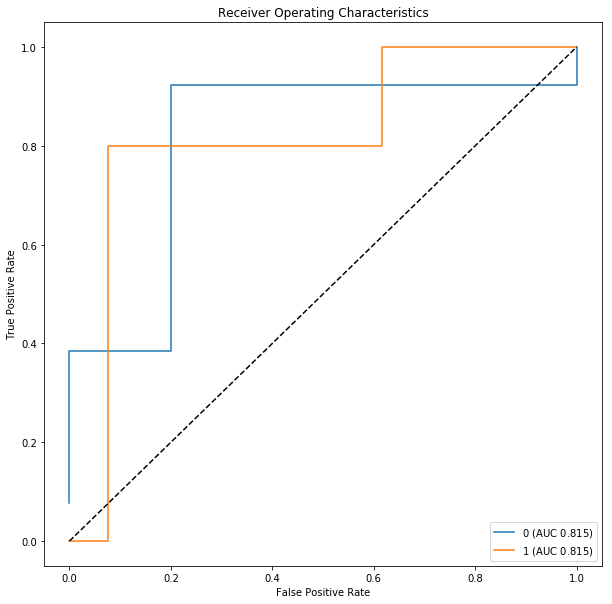

Precision : 0.9264214046822742
Recall: 0.5217391304347826
F1: 0.6122487143525012
AUC: 0.7380952380952381


In [35]:
# Adding category since lucem illud HAS to have it just like that
# And switching vect temporarily since lucem illud expects it to be the features...
news_test['category'] = news_test['label']
news_test['temp'] = news_test['vect']
news_test['vect'] = news_test['pca_reduced']
lucem_illud.plotConfusionMatrix(logistic, news_test)
lucem_illud.metrics.evaluateClassifier(logistic, news_test)
lucem_illud.plotMultiROC(logistic, news_test)

print("Precision : {}".format(sklearn.metrics.precision_score(news_test['log_predict'], news_test['label'], average = 'weighted')))
print("Recall: {}".format(sklearn.metrics.recall_score(news_test['log_predict'], news_test['label'], average = 'weighted')))
print("F1: {}".format(sklearn.metrics.f1_score(news_test['log_predict'], news_test['label'], average = 'weighted')))
print("AUC: {}".format(sklearn.metrics.roc_auc_score(news_test['log_predict'], news_test['label'], average = 'weighted')))

news_test['vect'] = news_test['temp']
news_test['temp'] = None

In [36]:
# Now Naive Bayes
BinNB_news = sklearn.naive_bayes.GaussianNB()
BinNB_news.fit(np.stack(news_train['vect'], axis = 0), news_train['label'])
BinNB_news.score(np.stack(news_train['vect'], axis=0), news_train['label'])

#testing
BinNB_news.score(np.stack(news_test['vect'], axis=0), news_test['label'])
news_test['binnb_predict'] = BinNB_news.predict(np.stack(news_test['vect'], axis=0))

GaussianNB(priors=None)

0.8924731182795699

0.6521739130434783

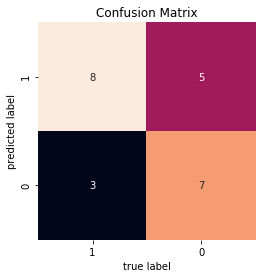

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.657692,0.664944,0.347826,0.727273,0.615385
1,0.657692,0.538768,0.347826,0.583333,0.700000


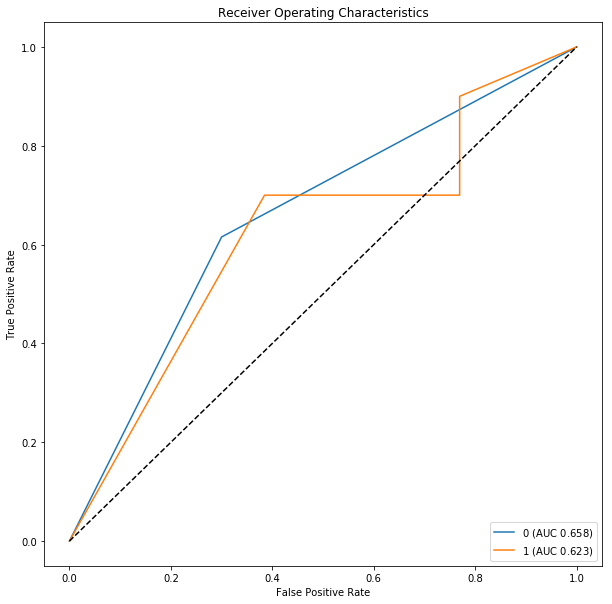

Precision : 0.6595317725752509
Recall: 0.6521739130434783
F1: 0.6508563899868249
AUC: 0.6553030303030304


In [37]:
lucem_illud.plotConfusionMatrix(BinNB_news, news_test)
lucem_illud.metrics.evaluateClassifier(BinNB_news, news_test)
lucem_illud.plotMultiROC(BinNB_news, news_test)

print("Precision : {}".format(sklearn.metrics.precision_score(news_test['binnb_predict'], news_test['label'], average = 'weighted')))
print("Recall: {}".format(sklearn.metrics.recall_score(news_test['binnb_predict'], news_test['label'], average = 'weighted')))
print("F1: {}".format(sklearn.metrics.f1_score(news_test['binnb_predict'], news_test['label'], average = 'weighted')))
print("AUC: {}".format(sklearn.metrics.roc_auc_score(news_test['binnb_predict'], news_test['label'], average = 'weighted')))


The methods don't perform all that well for this specific scenario. 

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

In [ ]:
blobs_df = lucem_illud.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud.trainTestSplit(blobs_df)
lucem_illud.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [ ]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

To see what's going on visually with the classification: 

In [ ]:
lucem_illud.plotregions(clf_tree, df_exampleTree_train)

In [ ]:
lucem_illud.evaluateClassifier(clf_tree, df_exampleTree_test)

Lets look at accuracy:

In [ ]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

What happens if we trim the tree?

In [ ]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [ ]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [ ]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

In [ ]:
lucem_illud.plotregions(bag, df_exampleTree_test)

In [ ]:
lucem_illud.evaluateClassifier(bag, df_exampleTree_test)

In [ ]:
lucem_illud.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.9032258064516129

0.9130434782608695

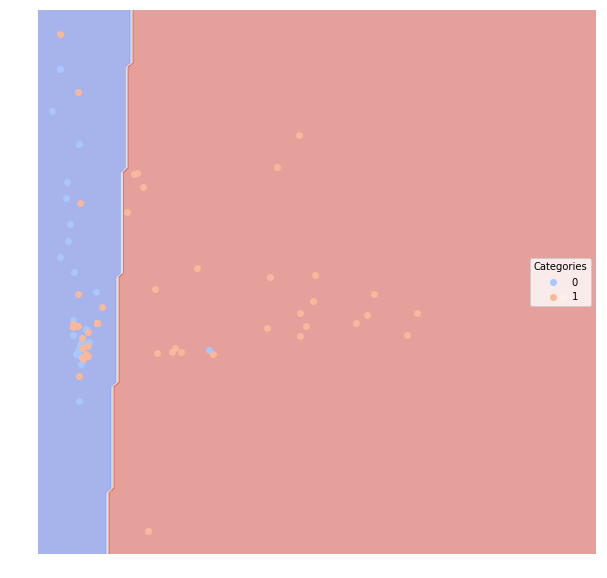

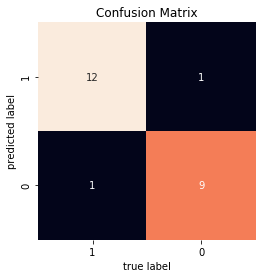

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.911538,0.895549,0.086957,0.923077,0.923077
1,0.911538,0.853478,0.086957,0.900000,0.900000


Precision : 0.9130434782608695
Recall: 0.9130434782608695
F1: 0.9130434782608695
AUC: 0.9115384615384615


In [43]:
news_tree = sklearn.tree.DecisionTreeClassifier(max_depth=10)
news_tree.fit(np.stack(news_train['vect'], axis = 0), news_train['label'])
news_tree.score(np.stack(news_train['vect'], axis=0), news_train['label'])

#testing
news_tree.score(np.stack(news_test['vect'], axis=0), news_test['label'])
news_test['tree_predict'] = news_tree.predict(np.stack(news_test['vect'], axis=0))
news_train['category'] = news_train['label']
lucem_illud.plotregions(news_tree, news_train)
lucem_illud.plotConfusionMatrix(news_tree, news_test)
lucem_illud.metrics.evaluateClassifier(news_tree, news_test)

print("Precision : {}".format(sklearn.metrics.precision_score(news_test['tree_predict'], news_test['label'], average = 'weighted')))
print("Recall: {}".format(sklearn.metrics.recall_score(news_test['tree_predict'], news_test['label'], average = 'weighted')))
print("F1: {}".format(sklearn.metrics.f1_score(news_test['tree_predict'], news_test['label'], average = 'weighted')))
print("AUC: {}".format(sklearn.metrics.roc_auc_score(news_test['tree_predict'], news_test['label'], average = 'weighted')))



BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

0.956989247311828

0.8695652173913043

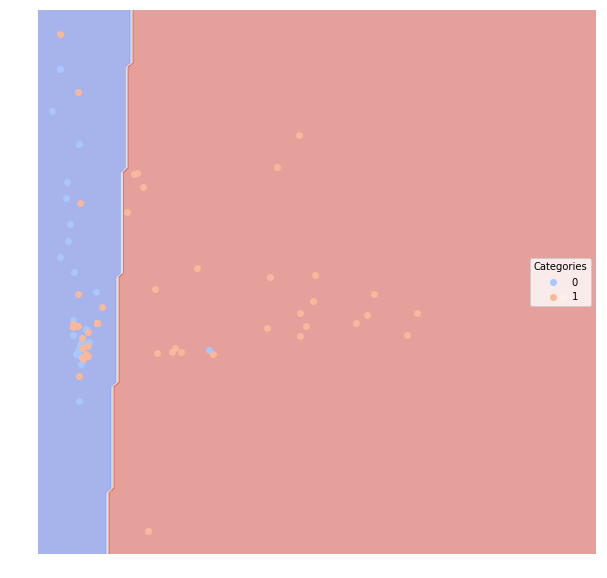

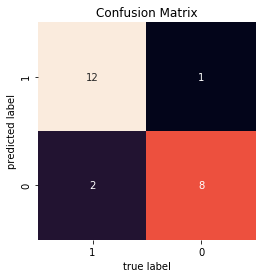

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.861538,0.834687,0.130435,0.857143,0.923077
1,0.861538,0.798068,0.130435,0.888889,0.800000


Precision : 0.8749163879598661
Recall: 0.8695652173913043
F1: 0.8705822527332825
AUC: 0.873015873015873


In [44]:
news_short_tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) 
news_bag = sklearn.ensemble.BaggingClassifier(news_short_tree, n_estimators=100, max_samples=0.8, random_state=1)
news_bag.fit(np.stack(news_train['vect'], axis = 0), news_train['label'])
news_bag.score(np.stack(news_train['vect'], axis=0), news_train['label'])

#testing
news_bag.score(np.stack(news_test['vect'], axis=0), news_test['label'])
news_test['bag_predict'] = news_bag.predict(np.stack(news_test['vect'], axis=0))
lucem_illud.plotregions(news_tree, news_train)
lucem_illud.plotConfusionMatrix(news_bag, news_test)
lucem_illud.metrics.evaluateClassifier(news_bag, news_test)

print("Precision : {}".format(sklearn.metrics.precision_score(news_test['bag_predict'], news_test['label'], average = 'weighted')))
print("Recall: {}".format(sklearn.metrics.recall_score(news_test['bag_predict'], news_test['label'], average = 'weighted')))
print("F1: {}".format(sklearn.metrics.f1_score(news_test['bag_predict'], news_test['label'], average = 'weighted')))
print("AUC: {}".format(sklearn.metrics.roc_auc_score(news_test['bag_predict'], news_test['label'], average = 'weighted')))


These methods perform really well! It's a little surprising that the ensemble of trees performs worse, but it might be because of overfitting.
Ensembles take a set of classifiers and tries to use them all to classify. To do that, a weighting/voting mechanism is needed among the weaker classifiers. The classifiers in the ensemble are usually simpler versions, like a shorter tree. 

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [ ]:
newsgroupsDF[:5]

Make a testing and training set:

In [ ]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [ ]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [ ]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [ ]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

In [ ]:
lucem_illud.evaluateClassifier(clf_knearest, train_ng_df)

And lets look at the testing data

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Let's produce another confusion matrix:

In [ ]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.8279569892473119

0.7391304347826086

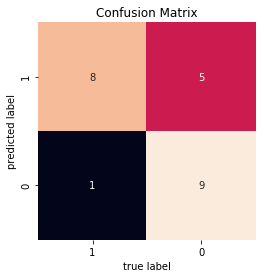

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.757692,0.76440,0.26087,0.888889,0.615385
1,0.757692,0.62205,0.26087,0.642857,0.900000


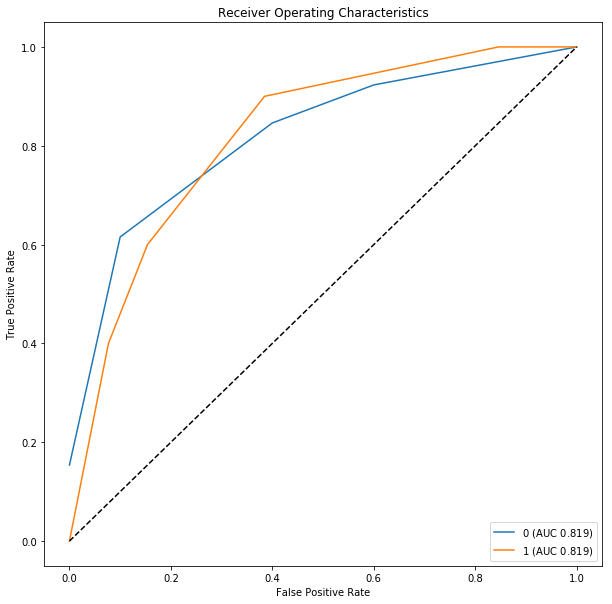

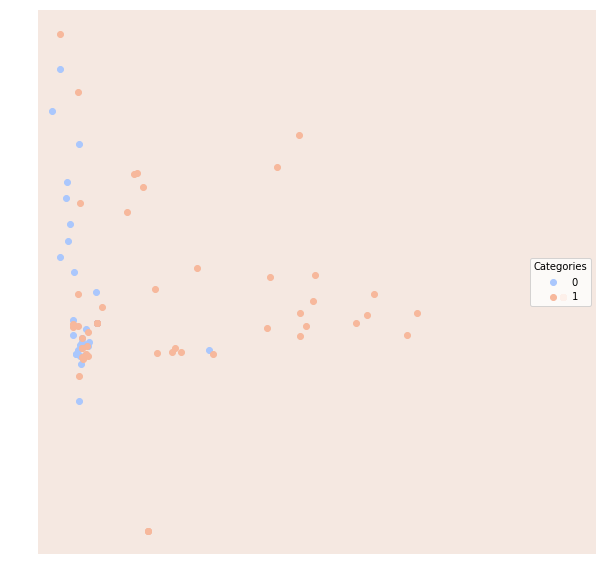

Precision : 0.788628762541806
Recall: 0.7391304347826086
F1: 0.741106719367589
AUC: 0.7658730158730158


In [56]:

news_KNN = sklearn.neighbors.KNeighborsClassifier(5, weights='uniform')

news_KNN.fit(np.stack(news_train['vect'], axis = 0), news_train['label'])
news_KNN.score(np.stack(news_train['vect'], axis=0), news_train['label'])

#testing
news_KNN.score(np.stack(news_test['vect'], axis=0), news_test['label'])
news_test['KNN_predict'] = news_KNN.predict(np.stack(news_test['vect'], axis=0))

lucem_illud.plotConfusionMatrix(news_KNN, news_test)
lucem_illud.metrics.evaluateClassifier(news_KNN, news_test)
lucem_illud.plotMultiROC(news_KNN, news_test)
lucem_illud.plotregions(news_KNN, news_train)

print("Precision : {}".format(sklearn.metrics.precision_score(news_test['KNN_predict'], news_test['label'], average = 'weighted')))
print("Recall: {}".format(sklearn.metrics.recall_score(news_test['KNN_predict'], news_test['label'], average = 'weighted')))
print("F1: {}".format(sklearn.metrics.f1_score(news_test['KNN_predict'], news_test['label'], average = 'weighted')))
print("AUC: {}".format(sklearn.metrics.roc_auc_score(news_test['KNN_predict'], news_test['label'], average = 'weighted')))


KNN is related to K-means clustering in the sense that both approaches take a point (a random point in clustering, whereas it's a test point in classification) and then associate that point with its nearest neighbors, in one for clustering and in the other to determine a label. Same approach, different objective. 

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [ ]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: nltk.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

We will tf.idf the data to make our vectors:

In [ ]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [ ]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [ ]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

...and consider the results:

In [ ]:
lucem_illud.evaluateClassifier(clf_svm, test_redditDf)

In [ ]:
lucem_illud.plotConfusionMatrix(clf_svm, test_redditDf)

In [ ]:
lucem_illud.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [ ]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

In [ ]:
lucem_illud.evaluateClassifier(clf_nn, test_redditDf)

In [ ]:
lucem_illud.plotConfusionMatrix(clf_nn, test_redditDf)

In [ ]:
lucem_illud.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

/home/molo/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

0.956989247311828

0.6956521739130435

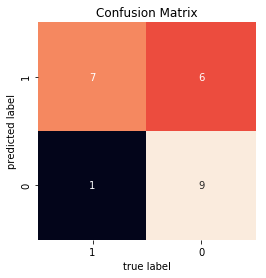

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.719231,0.732023,0.304348,0.875,0.538462
1,0.719231,0.583478,0.304348,0.600,0.900000


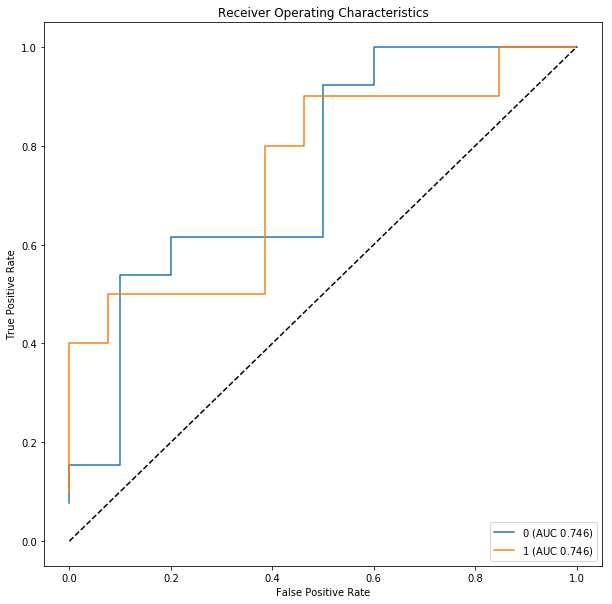

Precision : 0.7742474916387959
Recall: 0.6956521739130435
F1: 0.7014492753623188
AUC: 0.7375


In [57]:

news_MLP = sklearn.neural_network.MLPClassifier()

news_MLP.fit(np.stack(news_train['vect'], axis = 0), news_train['label'])
news_MLP.score(np.stack(news_train['vect'], axis=0), news_train['label'])

#testing
news_MLP.score(np.stack(news_test['vect'], axis=0), news_test['label'])
news_test['MLP_predict'] = news_MLP.predict(np.stack(news_test['vect'], axis=0))

lucem_illud.plotConfusionMatrix(news_MLP, news_test)
lucem_illud.metrics.evaluateClassifier(news_MLP, news_test)
lucem_illud.plotMultiROC(news_MLP, news_test)

print("Precision : {}".format(sklearn.metrics.precision_score(news_test['MLP_predict'], news_test['label'], average = 'weighted')))
print("Recall: {}".format(sklearn.metrics.recall_score(news_test['MLP_predict'], news_test['label'], average = 'weighted')))
print("F1: {}".format(sklearn.metrics.f1_score(news_test['MLP_predict'], news_test['label'], average = 'weighted')))
print("AUC: {}".format(sklearn.metrics.roc_auc_score(news_test['MLP_predict'], news_test['label'], average = 'weighted')))


In this case, the multi-layer perceptron performs worse than decision trees. We might not have enough data for this method to be useful, since there were only 116 labeled datapoints in the Amazon MTurk request.